# Question 7
<br>The dataset gives the maturity (1m, 4m, 7m, 10m...) and the corresponding price of zero-coupon bonds. FV - face value, r - spot rate (ARP compounded semiannually), f - forward rate, Z - discount function 
<br>
<br>**Spot curve:**
<br>Price of a zero-coupon bond: $P= \frac{FV}{(1+\frac{r}{k})^{kT}}$
<br>Therefore the spot rate: $r = [(\frac{FV}{P})^{\frac{1}{kT}}-1]\cdot k$
<br>In this case, FV = 100 and k = 2, with given maturity T and Price P, we get the spot rate for spot curve
<br>
<br>**3-month forward rate curve:**
<br>Relationship between forward rate and spot rate: $(1+\frac{r_k(t,T_2)}{k})^{k(T_2-t)}=(1+\frac{r_k(t,T_1)}{k})^{k(T_1-t)}\cdot (1+\frac{f_k(t,T_1,T_2)}{k})^{k(T_2-T_1)}$
<br>Therefore $f_k(t,T_1,T_2)=(\frac{(1+\frac{r_k(t,T_2)}{k})^{k(T_2-t)}}{(1+\frac{r_k(t,T_1)}{k})^{k(T_1-t)}}-1)^{\frac{1}{k\cdot(T_2-T_1)}}\cdot k$
<br>In this case, $k=2,t=0$,$T_1$ and $T_2$ are the start and end month of a rolling 3 month (0.25 year) period, thus:
<br>$(1+\frac{r_2(0,T+0.25)}{2})^{2(T+0.25)}=(1+\frac{r_2(0,T)}{2})^{2(T)}\cdot (1+\frac{f_2(0,T,T+0.25)}{2})^{2\cdot(0.25)}$
<br>Therefore the 3-month forward rate: $f_2(0,T,T+0.25)=(\frac{(1+\frac{r_2(0,T+0.25)}{2})^{2(T+0.25)}}{(1+\frac{r_2(0,T)}{2})^{2(T)}}-1)^{\frac{1}{0.25}}\cdot2$
<br>
<br>**Par Curve:**
<br>$r_p(0,t)$ is the par yield for maturity t, $Z_t$ is the discount function for maturity t, semiannual coupon frequency 0.5.
<br>*Case 1*: For maturity $t<0.5$ coupon bond, it pays the partial $\frac{t}{12}$ of coupon and the principal at expiry. It's cash flow using t-month par yield is: $1=1\cdot {\frac{t}{12}}\cdot r_p(0,\frac{t}{12})\cdot Z_{\frac{t}{12}}+1\cdot Z_{\frac{t}{12}}$ 
<br> For $t=\frac{1}{12}$, $1=r_p(0,\frac{1}{12})\cdot{\frac{1}{12}}\cdot Z_{\frac{1}{12}}+1\cdot Z_{\frac{1}{12}}$ 
<br> For $t=\frac{4}{12}$, $1=r_p(0,\frac{4}{12})\cdot {\frac{4}{12}}\cdot Z_{\frac{4}{12}}+1\cdot Z_{\frac{4}{12}}$
<br> Therefore, the par yield: $r_p(0,\frac{t}{12}) = \frac{(1-Z_{\frac{t}{12}})}{{\frac{t}{12}}\cdot Z_{\frac{t}{12}}}$, where $\frac{t}{12}$ is the maturity, $Z_{\frac{t}{12}}= Price_{\frac{t}{12}}/FV_{\frac{t}{12}}$
<br>*Case 2*: For maturity $t>0.5$ coupon bond, it pays a partial coupon, a series of full coupon and the principal at expiry.
<br> For $t=\frac{n}{12}$ where n mod 6 = 1, the cash flow is: $1=r_p(0,\frac{n}{12})\cdot [{\frac{1}{12}}\cdot Z_{\frac{1}{12}}+\frac{1}{2}Z_{\frac{7}{12}}+\cdots \frac{1}{2}Z_{\frac{n-6}{12}}+\frac{1}{2}Z_{\frac{n}{12}}]+1\cdot Z_{\frac{n}{12}}$
<br> For $t=\frac{n}{12}$ where n mod 6 = 4, the cash flow is: $1=r_p(0,\frac{n}{12})\cdot [{\frac{4}{12}}\cdot Z_{\frac{4}{12}}+\frac{1}{2}Z_{\frac{10}{12}}+\cdots \frac{1}{2}Z_{\frac{n-6}{12}}+\frac{1}{2}Z_{\frac{n}{12}}]+1\cdot Z_{\frac{n}{12}}$
<br> Cash flor for each $t=\frac{n}{12}$ has one more term $\frac{1}{2}Z_{\frac{n}{12}}$ in the braket than that of $t=\frac{n-6}{12}$

In [1]:
import pandas as pd
import numpy as np
# from Fixed_Income_Toolbox import Simple_Calculation as SC
# from Fixed_Income_Toolbox import Term_Structure_Estimations as TSE
from Fixed_Income_Toolbox import ZeroCouponBond as ZCB
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import os

%matplotlib inline

In [2]:
df = pd.read_excel('HW1_data.xls')
bond = ZCB(100, df['Maturity'])
df['Spot'] = bond.get_spot(df['Price'], k=2)
df['Forward'] = bond.get_forward(df['Spot'], df['Spot'].shift(-1), df['Maturity'], df['Maturity'].shift(-1), k=2)
df['Par Yield'] = bond.get_par_yield(df['Spot'], k=2)
df.head()

,Maturity,Price,Spot,Forward,Par Yield
0,0.083333,99.73,0.032708,0.038242,0.004641
1,0.333333,98.79,0.036857,0.037778,0.014698
2,0.583333,97.87,0.037251,0.027250,0.020060
3,0.833333,97.21,0.034246,0.036708,0.021445
4,1.083333,96.33,0.034814,0.035768,0.023894


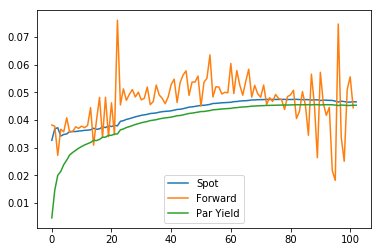

In [3]:
df.loc[:,'Spot':].plot()

# Question 8
<br>The estimated coefficients by regressing logZ on powers of T are:
<br>$a =-0.03261156, b = -0.0077892, c =-0.00001988299, d=0.000002853257, e=-0.00000004781605$

In [4]:
# Regress logZ on M1-M5
new_df = pd.DataFrame(df['Maturity'].apply(lambda x: x**i) for i in range(1,6)).T
new_df.columns = ['M1','M2','M3','M4','M5']
df['Discount Function'] = bond.get_discount_function(df['Spot'], df['Maturity'], k=2)
new_df['logZ'] = np.log(df['Discount Function'])
rls = sm.ols(formula="logZ ~ %s + 0" % "+".join(new_df.columns.tolist()),data=new_df).fit()
new_df['y_hat'] = rls.predict()
print(rls.params)

M1     -5.689539e-16
M2      1.585233e-16
M3      7.746590e-17
M4     -8.283925e-18
M5     -3.300816e-19
logZ    1.000000e+00
dtype: float64


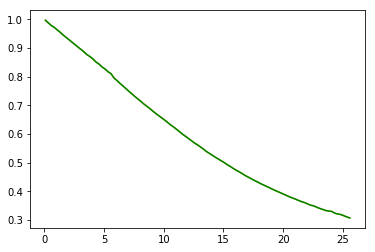

In [5]:
# Plot Z(T) and predicted z(T)
plt.plot(df['Maturity'],np.exp(new_df['y_hat']),'y-',df['Maturity'], df['Discount Function'], 'g-')
plt.show()

In [6]:
def estimate_term_structure(bond, est_price, columns):
    ts_df = pd.DataFrame(columns = columns)
    for col in columns:
        if col == 'Spot':
            ts_df.loc[:,col] = bond.get_spot(est_price, k=2)
        elif col == 'Par':
            ts_df.loc[:,col] = bond.get_par_yield(ts_df['Spot'], k=2)
        elif col == 'Forward6M':
            ts_df.loc[:,col] = bond.get_forward(ts_df['Spot'], ts_df['Spot'].shift(-2), bond.maturity, bond.maturity.shift(-2), k=2)
    return ts_df

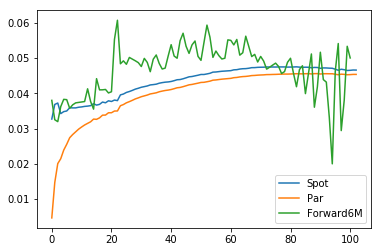

In [7]:
estimate_df1 = estimate_term_structure(bond, bond.fv * np.exp(new_df['y_hat']), ['Spot','Par','Forward6M'])
estimate_df1.plot()

# Question 9

In [15]:
# Nelson Siegel Estimation
est_price_ns = bond.nelson_siegel_estimation(df['Price'], variation=True)

/Users/niniliu/Documents/GitHub/MFE_Projects_Summer_2018/230I/Fixed_Income_Toolbox.py:107: RuntimeWarning: overflow encountered in exp
  exp_t2 = np.exp(- self.maturity / params[4])
/Users/niniliu/Documents/GitHub/MFE_Projects_Summer_2018/230I/Fixed_Income_Toolbox.py:66: RuntimeWarning: invalid value encountered in power
  return np.power(self.fv / (1 + spot / k), (self.maturity - t) * k)
/Users/niniliu/Documents/GitHub/MFE_Projects_Summer_2018/230I/Fixed_Income_Toolbox.py:102: RuntimeWarning: overflow encountered in exp
  exp_t1 = np.exp(- self.maturity / params[3])


Optimization terminated successfully.
         Current function value: 221269.084127
         Iterations: 798
         Function evaluations: 1448


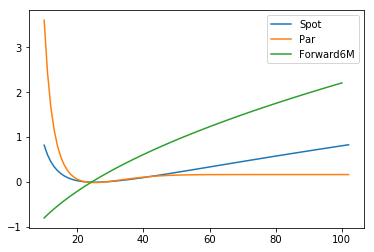

In [16]:
estimate_df2 = estimate_term_structure(bond, est_price_ns, ['Spot','Par','Forward6M'])
estimate_df2.iloc[10:,:].plot()

In [11]:
# Svensson Estimation
est_price_s = bond.svensson_estimation(df['Price'])

/Users/niniliu/Documents/GitHub/MFE_Projects_Summer_2018/230I/Fixed_Income_Toolbox.py:125: RuntimeWarning: overflow encountered in exp
  exp_t1 = np.exp(- self.maturity / params[4])
/Users/niniliu/Documents/GitHub/MFE_Projects_Summer_2018/230I/Fixed_Income_Toolbox.py:66: RuntimeWarning: invalid value encountered in power
  return np.power(self.fv / (1 + spot / k), (self.maturity - t) * k)
/Users/niniliu/Documents/GitHub/MFE_Projects_Summer_2018/230I/Fixed_Income_Toolbox.py:134: RuntimeWarning: overflow encountered in power
  error = np.dot(np.power(est_price - true_price, 2),1 / self.maturity)


Optimization terminated successfully.
         Current function value: 219377.695602
         Iterations: 770
         Function evaluations: 1264


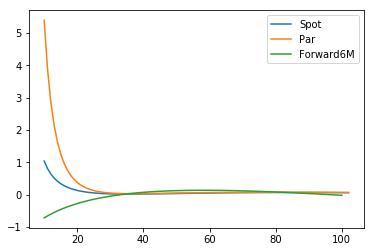

In [14]:
estimate_df3 = estimate_term_structure(bond, est_price_s, ['Spot','Par','Forward6M'])
estimate_df3.iloc[10:,:].plot()

## Original Solution

In [137]:
df = pd.read_excel('HW1_data.xls')
#spot rate
df = SC.getspot(df,k=2,name='Spot') 
#3-month forward rate
df = SC.getforward(df,k=2,deltaT = 0.25, T = 0.25,name = 'Forward',sourse = 'Spot')
#Par yield
df = SC.getPar(df,k=2,CouponFreq = 0.5, deltaT = 0.25,name = 'Par Yield')
df.head()

,Maturity,Price,Spot,Forward,Interm,Par Yield
0,0.083333,99.73,0.032708,0.038242,0.083108,0.032488
1,0.333333,98.79,0.036857,0.037778,0.329300,0.036745
2,0.583333,97.87,0.037251,0.027250,0.572458,0.037208
3,0.833333,97.21,0.034246,0.036708,0.815350,0.034218
4,1.083333,96.33,0.034814,0.035768,1.054108,0.034816


### (b)
The 30 years semiannual maturity and its powers constitute a $60*5$ matrix X, and we estimated the $5*1$ coefficient matrix $\beta$. The estimated discount function $DF_{est} = e^{X\beta}$ and the estimated Price $P_{est} = DF_{est}\cdot FV=e^{X\beta}\cdot 100$. From then on we could calculate the spot rate using X and $P_{est}$.

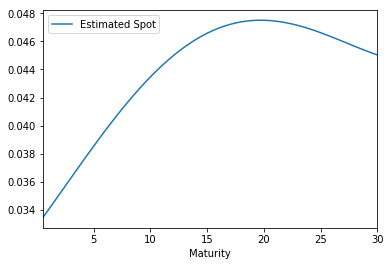

In [210]:
SA = np.array(range(1,61))/2
X = np.column_stack((SA,SA**2,SA**3,SA**4,SA**5))
beta = rls.params
estDF = np.exp(np.matmul(X,beta))
est_df = pd.DataFrame(estDF,columns = ['Estimated DF'])
est_df['Maturity'] = SA
est_df['Estimated Price'] = est_df['Estimated DF']*100
est_df = SC.getspot(est_df,k=2,name = 'Estimated Spot',sourse = 'Estimated Price',face =100)
est_df.plot(y = ['Estimated Spot'], x = ['Maturity'])
plt.show()

### (c)
We can estimate the par yield as in Q7 using 30 years semiannual compounding setup.

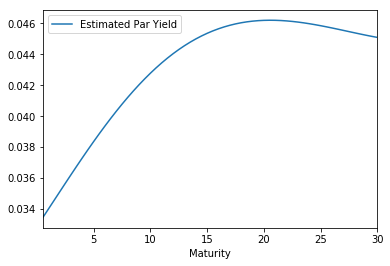

In [201]:
est_df = SC.getPar(est_df,k=2,CouponFreq = 0.5, deltaT = 0.5, name = 'Estimated Par Yield', sourse = 'Estimated Price', face = 100)
est_df.plot(y= ['Estimated Par Yield'],x = ['Maturity'])
plt.show()

### (d)
<br> The 60 years semiannual maturity and its powers constitute a  120∗5 matrix X2. And then we estimate discount function, spot rate and eventually 6-month forward rate.

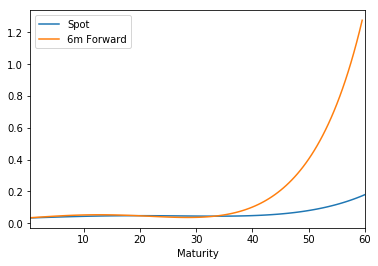

In [220]:
SA2 = np.array(np.arange(1,121))/2
X2 =np.column_stack((SA2,SA2**2,SA2**3,SA2**4,SA2**5))
estDF2 = np.exp(np.matmul(beta,X2.T))
est_df2 = pd.DataFrame(estDF2,columns=['Estimated DF2'])
est_df2['Maturity'] = SA2
est_df2['Price'] = est_df2['Estimated DF2']*100
est_df2 = SC.getspot(est_df2,k=2,name = 'Spot', face = 100)
est_df2 = SC.getforward(est_df2, k =2, deltaT = 0.5, T = 0.5, name = '6m Forward', sourse = 'Spot',face = 100)
est_df2.plot(y=['Spot','6m Forward'],x= ['Maturity'])
plt.show()

# Question 9